# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
url_tesla = 'https://ycharts.com/companies/TSLA/revenues'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url_tesla, headers=headers).text


In [4]:
soup = BeautifulSoup(response, 'html.parser' )

In [96]:
date_all = soup.find_all("td", limit=100)
date_all

[<td>June 30, 2024</td>,
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>,
 <td>March 31, 2024</td>,
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>,
 <td>December 31, 2023</td>,
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>,
 <td>September 30, 2023</td>,
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>,
 <td>June 30, 2023</td>,
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>,
 <td>March 31, 2023</td>,
 <td class="text-right">
                             

In [6]:
# Lista de fechas y valores sin modificar
list_all = []
for fecha in date_all:
    list_all.append(fecha.get_text(strip=True))
print(list_all)



['June 30, 2024', '25.50B', 'March 31, 2024', '21.30B', 'December 31, 2023', '25.17B', 'September 30, 2023', '23.35B', 'June 30, 2023', '24.93B', 'March 31, 2023', '23.33B', 'December 31, 2022', '24.32B', 'September 30, 2022', '21.45B', 'June 30, 2022', '16.93B', 'March 31, 2022', '18.76B', 'December 31, 2021', '17.72B', 'September 30, 2021', '13.76B', 'June 30, 2021', '11.96B', 'March 31, 2021', '10.39B', 'December 31, 2020', '10.74B', 'September 30, 2020', '8.771B', 'June 30, 2020', '6.036B', 'March 31, 2020', '5.985B', 'December 31, 2019', '7.384B', 'September 30, 2019', '6.303B', 'June 30, 2019', '6.35B', 'March 31, 2019', '4.541B', 'December 31, 2018', '7.226B', 'September 30, 2018', '6.824B', 'June 30, 2018', '4.002B', 'March 31, 2018', '3.409B', 'December 31, 2017', '3.288B', 'September 30, 2017', '2.985B', 'June 30, 2017', '2.790B', 'March 31, 2017', '2.696B', 'December 31, 2016', '2.285B', 'September 30, 2016', '2.298B', 'June 30, 2016', '1.270B', 'March 31, 2016', '1.147B', '

In [98]:
# Listas separadas de fechas y valores sin modificar
date_s = []
value_s = []
for x in range(len(list_all)):
    if x % 2 == 0:
        date_s.append(list_all[x])
    else:
        value_s.append(list_all[x])
   
date_s

['June 30, 2024',
 'March 31, 2024',
 'December 31, 2023',
 'September 30, 2023',
 'June 30, 2023',
 'March 31, 2023',
 'December 31, 2022',
 'September 30, 2022',
 'June 30, 2022',
 'March 31, 2022',
 'December 31, 2021',
 'September 30, 2021',
 'June 30, 2021',
 'March 31, 2021',
 'December 31, 2020',
 'September 30, 2020',
 'June 30, 2020',
 'March 31, 2020',
 'December 31, 2019',
 'September 30, 2019',
 'June 30, 2019',
 'March 31, 2019',
 'December 31, 2018',
 'September 30, 2018',
 'June 30, 2018',
 'March 31, 2018',
 'December 31, 2017',
 'September 30, 2017',
 'June 30, 2017',
 'March 31, 2017',
 'December 31, 2016',
 'September 30, 2016',
 'June 30, 2016',
 'March 31, 2016',
 'December 31, 2015',
 'September 30, 2015',
 'June 30, 2015',
 'March 31, 2015',
 'December 31, 2014',
 'September 30, 2014',
 'June 30, 2014',
 'March 31, 2014',
 'December 31, 2013',
 'September 30, 2013',
 'June 30, 2013',
 'March 31, 2013',
 'December 31, 2012',
 'September 30, 2012',
 'June 30, 2012'

In [97]:
# Valores modificados 
values_final = []
for item in value_s:
            if 'B' in item:
                values_final.append(float(item.replace('B','')) * 10**9)
            elif 'M' in item:
                values_final.append(float(item.replace('M','')) * 10**6)

values_final

[25500000000.0,
 21300000000.0,
 25170000000.0,
 23350000000.0,
 24930000000.0,
 23330000000.0,
 24320000000.0,
 21450000000.0,
 16930000000.0,
 18760000000.0,
 17720000000.0,
 13760000000.0,
 11960000000.0,
 10390000000.0,
 10740000000.0,
 8771000000.0,
 6036000000.0,
 5985000000.0,
 7384000000.0,
 6303000000.0,
 6350000000.0,
 4541000000.0,
 7226000000.0,
 6824000000.0,
 4002000000.0,
 3409000000.0,
 3288000000.0,
 2985000000.0,
 2790000000.0,
 2696000000.0,
 2285000000.0,
 2298000000.0,
 1270000000.0,
 1147000000.0,
 1214000000.0,
 936790000.0,
 954980000.0,
 939880000.0,
 956660000.0,
 851800000.0,
 769350000.0,
 620540000.0,
 615220000.0,
 431350000.0,
 405140000.0,
 561790000.0,
 306330000.0,
 50100000.0,
 26650000.0,
 30170000.0]

In [100]:
# DICT
tesla_revenue = {
    'Dates': date_s,
    'Values': values_final
}

# DATAFRAME
tesla_dataframe = pd.DataFrame(tesla_revenue)


In [87]:
# reemplazo de las ',' por '' y obtención del dataframe final
filt_tesla_dataframe = tesla_dataframe.replace(',', '', regex = True)


# Convertir las fechas
filt_tesla_dataframe['Dates'] = pd.to_datetime(filt_tesla_dataframe['Dates'], format = '%B %d %Y')
filt_tesla_dataframe

,Dates,Values
0,2024-06-30,2.550000e+10
1,2024-03-31,2.130000e+10
2,2023-12-31,2.517000e+10
3,2023-09-30,2.335000e+10
4,2023-06-30,2.493000e+10
5,2023-03-31,2.333000e+10
6,2022-12-31,2.432000e+10
7,2022-09-30,2.145000e+10
8,2022-06-30,1.693000e+10
9,2022-03-31,1.876000e+10


In [94]:
connection = sqlite3.connect('filt_tesla_dataframe')
cursor = connection.cursor()

In [95]:
filt_tesla_dataframe.to_sql('TeslaRevenue', connection, if_exists='replace', index = False)

50

# Gráfico de Líneas

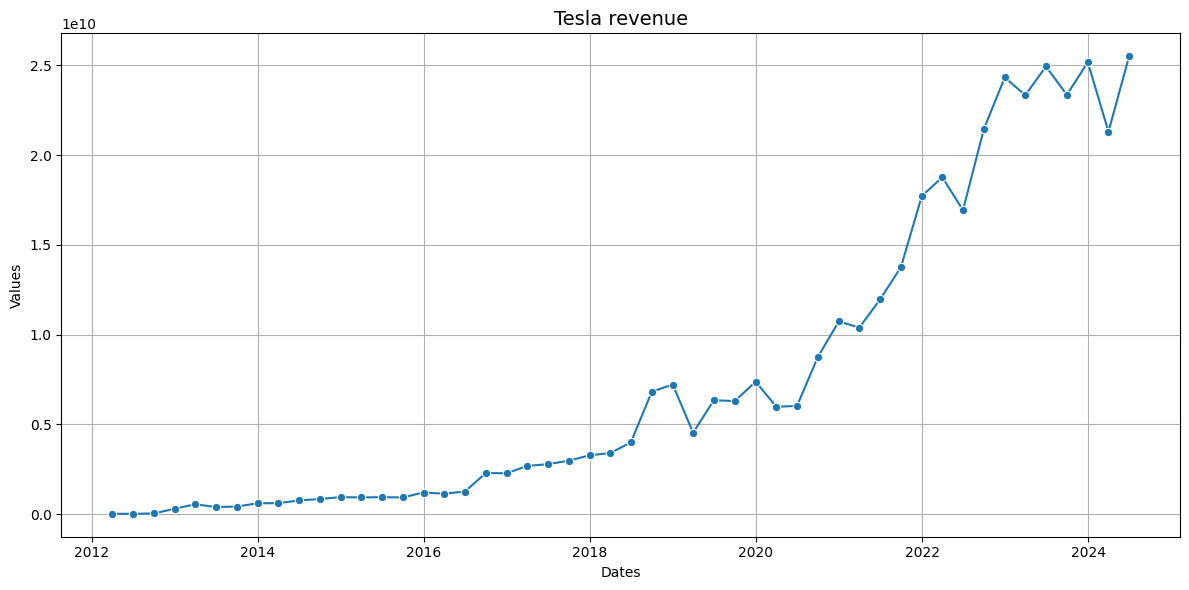

In [92]:
plt.figure(figsize = (12,6))

sns.lineplot(data = filt_tesla_dataframe,
              x="Dates",
                y="Values",
                marker = 'o')

plt.title('Tesla revenue',
           fontsize = 14)

plt.grid(True)

plt.tight_layout()

plt.show()



### Conclusión
 - En el gráfico de líneas podemos observar los picos y las caídas en las ventas

# Gráfico de barras


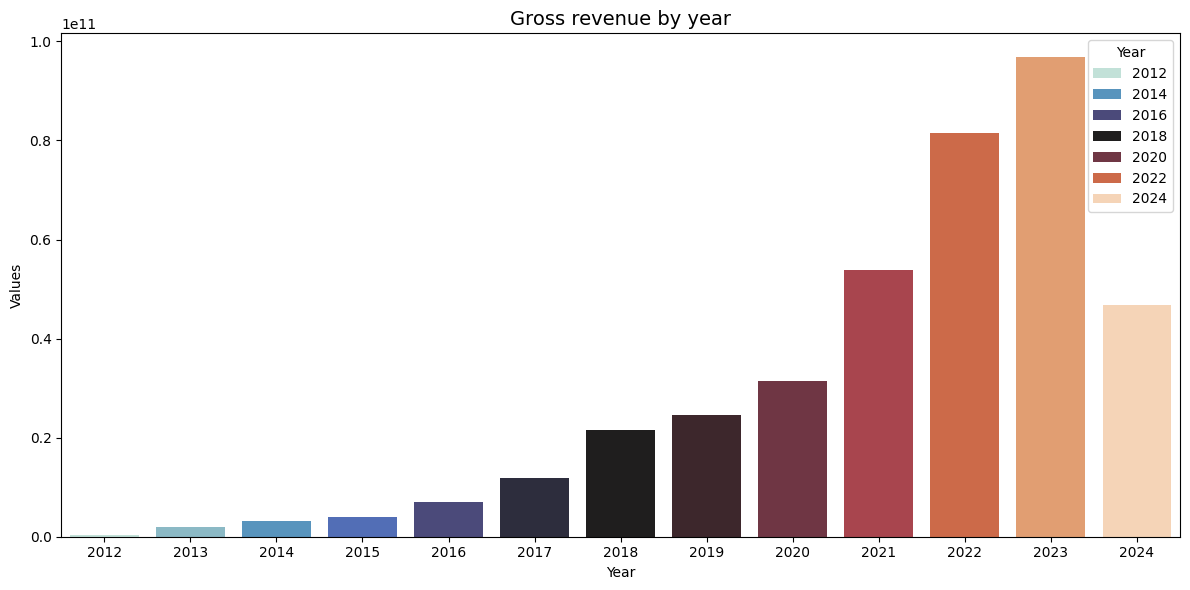

In [78]:
filt_tesla_dataframe['Year'] =  filt_tesla_dataframe['Dates'].dt.year

plt.figure(figsize = (12,6))

sns.barplot(x = 'Year',
             y = 'Values',
              hue='Year',
               data = filt_tesla_dataframe,
                errorbar = None,
                 estimator = sum,
                   palette = "icefire")

plt.title('Gross revenue by year', fontsize = 14)

plt.tight_layout()

plt.show()


### Conclusión 
- En el diagrama de barras podemos observar las diferencias de ventas entre años

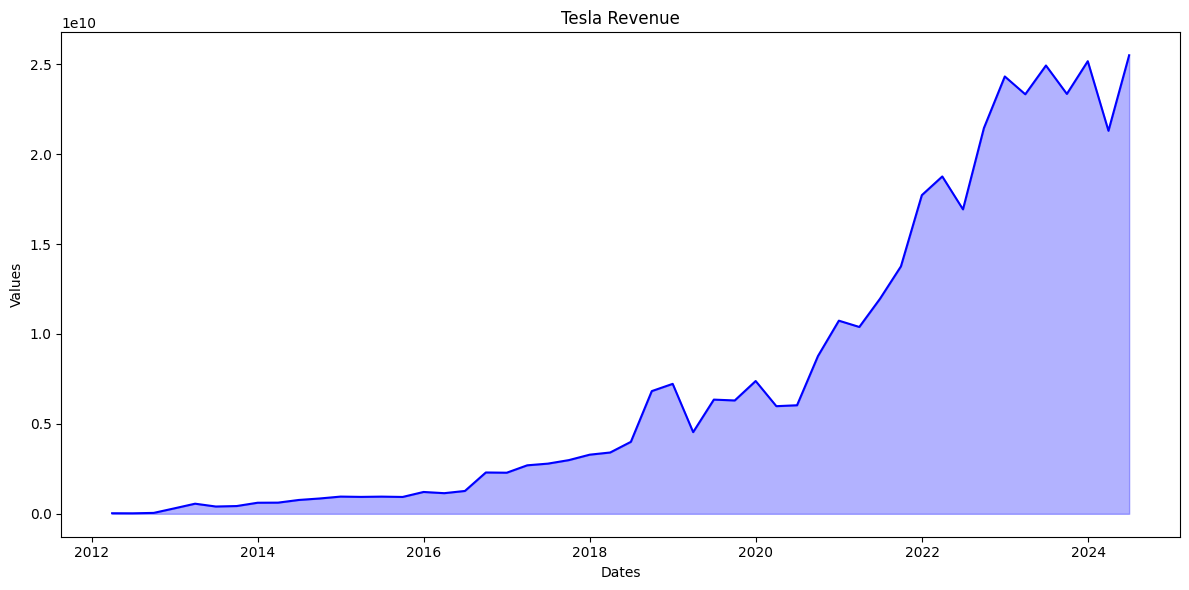

In [86]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Dates',
              y='Values',
                data=filt_tesla_dataframe,
                  color='blue')

plt.fill_between(filt_tesla_dataframe['Dates'],
                  filt_tesla_dataframe['Values'],
                    color='blue',
                      alpha=0.3)

plt.title("Tesla Revenue")

plt.tight_layout()

plt.show()